In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
# Load the data into a pandas DataFrame
data = pd.read_excel("Data/2W#.xlsx")

# Separate the features (X) and the target variable (y)
X = data.drop("Status", axis=1)  # Assuming "Status" is the name of the target variable column
y = data["Status"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
mean_speed = X['Speed'].mean()

print("Mean of 'Speed':", mean_speed)


Mean of 'Speed': 29.39747892120573


## Decision Tree

In [8]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
confusion = confusion_matrix(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Calculate POND and POD scores
POND = TP / (FP + TP)
POD = TP / (TP + FN)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("POND Score:", POND)
print("POD Score:", POD)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Visualize the decision tree
#dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["Not Accepted", "Accepted"])
#graph = graphviz.Source(dot_data)
#graph.render("decision_tree")  # Save the decision tree visualization as a PDF file

# Display the decision tree
#graph.view()


POND Score: 0.96875
POD Score: 0.96875
Accuracy: 0.9720930232558139
Precision: 0.96875
Recall: 0.96875
F1-score: 0.96875


In [20]:
import numpy as np

# Convert your data to NumPy arrays if they are not already
X_train = np.array(X_train)
y_train = np.array(y_train)

def calculate_mean_critical_gap(data, mean_speed_range=1.0):
    # Convert the data to a Pandas DataFrame
    df = pd.DataFrame(data, columns=['Speed', 'Gap', 'Status'])

    # Calculate the mean speed
    mean_speed = df['Speed'].mean()

    # Identify data points around the mean speed
    speed_mask = np.abs(df['Speed'] - mean_speed) <= mean_speed_range

    # Extract corresponding gap values
    selected_gaps = df.loc[speed_mask, 'Gap']

    # Identify indices where Status changes
    status_changes = np.where(df['Status'].shift() != df['Status'])[0]

    if len(status_changes) == 0:
        return None

    # Calculate mean critical gap
    status_change_gaps = selected_gaps.iloc[status_changes]

    mean_critical_gap = np.mean(status_change_gaps)

    return mean_critical_gap

# Assuming data is your dataset, and it contains the columns Speed, Gap, and Status
mean_critical_gap = calculate_mean_critical_gap(data)
if mean_critical_gap is not None:
    print("Mean Critical Gap:", mean_critical_gap)
else:
    print("No status changes found within the specified speed range.")


IndexError: positional indexers are out-of-bounds

## SVM

POND Score: 1.0
POD Score: 0.78125
Accuracy: 0.9023255813953488
Precision: 1.0
Recall: 0.78125
F1-score: 0.8771929824561403


c:\Users\weris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


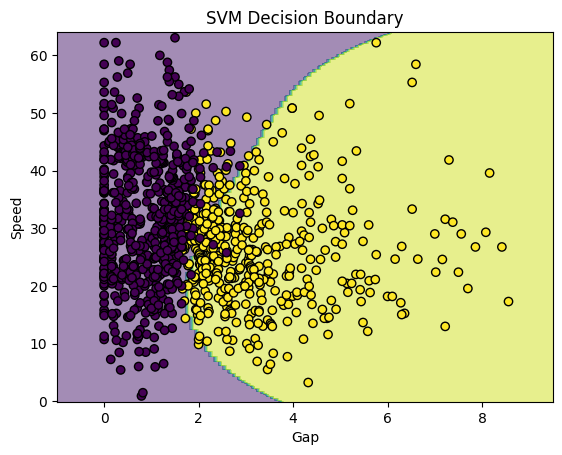

In [5]:
# Get the feature names
feature_names = X.columns.tolist()

# Initialize the SVM classifier
clf = SVC()

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Calculate POND and POD scores
POND = TP / (FP + TP)
POD = TP / (TP + FN)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("POND Score:", POND)
print("POD Score:", POD)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
# Evaluate the model's accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

# Visualize the decision boundary in 2D
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("SVM Decision Boundary")
plt.show()

In [7]:
import numpy as np

# Calculate the mean speed
mean_speed = np.mean(X_test['Speed'])

# Get the indices of support vectors
support_vector_indices = clf.support_

# Get the support vectors
support_vectors = X_train.iloc[support_vector_indices]

# Calculate the decision function values for the support vectors
decision_values = clf.decision_function(support_vectors)

# Find the index of the support vector closest to the decision boundary
closest_idx = np.argmin(np.abs(decision_values))

# Get the corresponding critical gap
mean_critical_gap = support_vectors.iloc[closest_idx]['Gap']

print("Mean Speed:", mean_speed)
print("Mean Critical Gap:", mean_critical_gap)


Mean Speed: 28.77487462207086
Mean Critical Gap: 1.7599999999999993


## Random Forest Classifier

In [19]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the Random Forest classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Calculate POND and POD scores
POND = TP / (FP + TP)
POD = TP / (TP + FN)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("POND Score:", POND)
print("POD Score:", POD)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

POND Score: 0.9789473684210527
POD Score: 0.96875
Accuracy: 0.9767441860465116
Precision: 0.9789473684210527
Recall: 0.96875
F1-score: 0.9738219895287958


## XGBoost Classifier

In [20]:
# Initialize the XGBoost classifier
clf = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective="binary:logistic")

# Train the XGBoost classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)

TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

# Calculate POND and POD scores
POND = TP / (FP + TP)
POD = TP / (TP + FN)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("POND Score:", POND)
print("POD Score:", POD)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

POND Score: 0.9791666666666666
POD Score: 0.9791666666666666
Accuracy: 0.9813953488372092
Precision: 0.9791666666666666
Recall: 0.9791666666666666
F1-score: 0.9791666666666666


In [7]:
# Initialize the XGBoost classifier
clf = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, objective="binary:logistic")

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

# Train the XGBoost classifier on the full training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Cross-Validation Scores: [0.95348837 0.95348837 0.9244186  0.97674419 0.95930233]
Average Accuracy: 0.9534883720930234
Test Accuracy: 0.9813953488372092


In [8]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

# Train the Random Forest classifier on the full training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Cross-Validation Scores: [0.95348837 0.95930233 0.94186047 0.98255814 0.95930233]
Average Accuracy: 0.9593023255813954
Test Accuracy: 0.9720930232558139


In [9]:
# Import the necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy")

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

# Train the Random Forest classifier on the full training set
clf.fit(X_train, y_train)

# Find the feature importances
feature_importances = clf.feature_importances_

# Find the index of the most important feature
most_important_feature_index = np.argmax(feature_importances)

# Get the critical gap value corresponding to the most important feature
critical_gap_value = X_train.iloc[:, most_important_feature_index].mean()

print("Critical Gap Value:", critical_gap_value)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Cross-Validation Scores: [0.95348837 0.95930233 0.94186047 0.98255814 0.95930233]
Average Accuracy: 0.9593023255813954
Critical Gap Value: 1.8653910852713178
Test Accuracy: 0.9720930232558139


In [27]:
X

,Gap,Speed
0,1.86,20.684839
1,1.98,14.966364
2,1.98,21.330000
3,2.00,9.860806
4,2.18,10.420909
...,...,...
1070,0.77,24.542857
1071,0.53,20.971429
1072,0.56,41.048649
1073,0.59,21.432258


In [31]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Assuming X is a pandas DataFrame with 'gap', 'speed', and 'status' columns

# Split the data into features (X_features) and target variable (y_target)
X_features = X[['Gap', 'Speed']]
y_target = y

# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_features, y_target)

# Calculate the mean speed
mean_speed = X['Speed'].mean()

# Create a new DataFrame with the mean speed and various gap values
gap_values = pd.DataFrame({'Gap': [0, 1]})
gap_values['Speed'] = mean_speed

# Use the trained model to predict 'status' for the mean speed and different gap values
predictions = model.predict(gap_values)

# Find the critical gap value for the mean speed where 'status' changes from 0 to 1
critical_gap = gap_values.loc[predictions == 1, 'Gap'].min()

print("Critical Gap Value for Mean Speed:", critical_gap)


Critical Gap Value for Mean Speed: nan
